# test constructed dataset

In [5]:
from PIL import Image
from dataset import rainy_dataset
import matplotlib.pyplot as plt

dataset=rainy_dataset(data_path="large_datasets/rainy_image_dataset",data_len=3, rainy_data_len=3,normalize=False)


(128, 128, 3)
torch.Size([3, 128, 128])


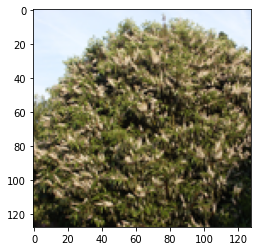

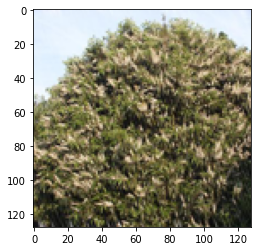

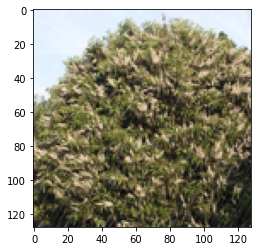

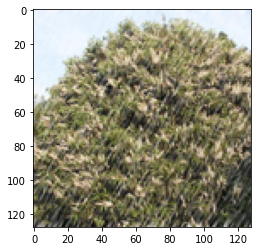

In [11]:
import numpy as np
import torch
from torchvision import transforms

data_sample=dataset.__getitem__(1)
for img in data_sample[1]:
    img = Image.fromarray(np.array(img))
    plt.figure()
    plt.imshow(img)
print(np.array(data_sample[1][0]).shape)
img = np.array(data_sample[1][0])
trans = transforms.Compose([transforms.ToTensor()])
print(trans(img).shape)

In [1]:
from PIL import Image
from dataset import rainy_dataset
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision import transforms
from torch import Tensor


dataset=rainy_dataset(data_path="large_datasets/rainy_image_dataset",data_len=3, rainy_data_len=1,normalize=True)
data_sample = dataset.__getitem__(0)

batch = []
for pic in data_sample[1]:
    batch.append(pic.unsqueeze(0))
batch = torch.cat(batch)

print(batch.shape)



torch.Size([2, 3, 128, 128])


In [2]:
from model import simple_energy

energy = simple_energy(3,3,128)
energy(batch)

tensor([[-0.0020],
        [-0.0295]], grad_fn=<AddmmBackward>)

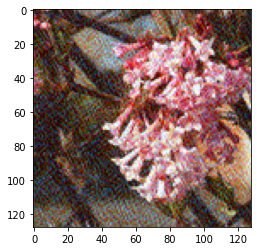

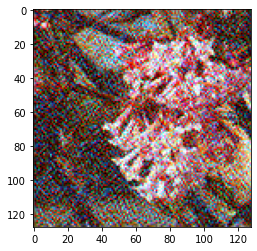

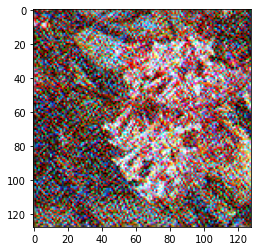

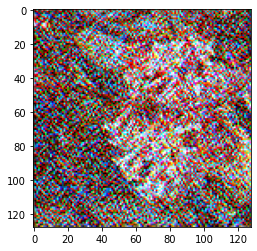

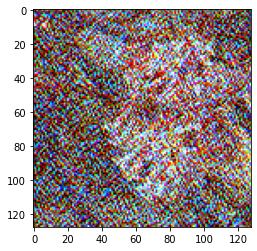

In [1]:
from PIL import Image
from dataset import rainy_dataset
import matplotlib.pyplot as plt
from train import single_forward
from model import simple_energy
import numpy as np

dataset=rainy_dataset(data_path="large_datasets/rainy_image_dataset",data_len=10, rainy_data_len=1,normalize=True)

fake_image = dataset.__getitem__(0)[1][1]
model = simple_energy(3,3,128)
fake_fig_list = single_forward(fake_image,model,5,200)
for img in fake_fig_list:
    img_array = np.array((img.permute(1,2,0).detach()+1)/2*255).astype(np.uint8)
    img=Image.fromarray(img_array)
    plt.figure()
    plt.imshow(img)

epoch :  0
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  1
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  2
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  3
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  4
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  5
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  6
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  7
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  8
0.18296067416667938
0.368419885635376
0.5513876080513
0.6938784122467041
0.7985067367553711
epoch :  9
0.18296067416667938
0.368419885635376
0.5513876080513
0.693878

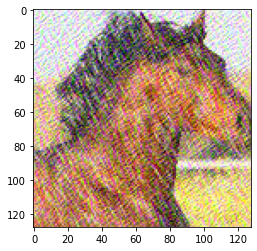

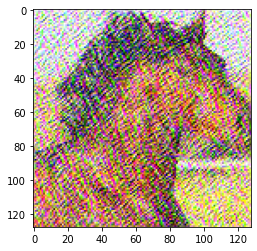

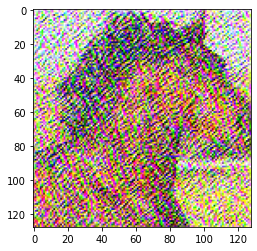

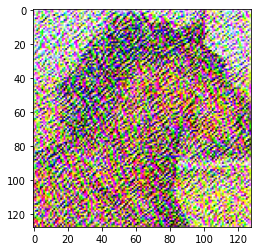

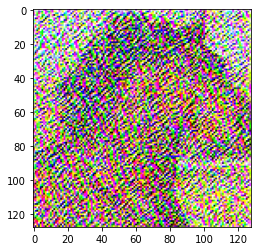

In [1]:
from PIL import Image
from dataset import rainy_dataset
import matplotlib.pyplot as plt
from train import single_forward, train
from model import simple_energy
import numpy as np

dataset=rainy_dataset(data_path="large_datasets/rainy_image_dataset",data_len=10, rainy_data_len=1,normalize=True)
data_loader = []
for i in range(1):
    data_loader.append(dataset.__getitem__(i)[1])


model = simple_energy(3,3,128)

# single forward
fake_image = dataset.__getitem__(0)[1][1]
fake_fig_list = single_forward(fake_image,model,5,200)
for img in fake_fig_list:
    img_array = np.array((img.permute(1,2,0).detach()+1)/2*255).astype(np.uint8)
    img=Image.fromarray(img_array)
    plt.figure()
    plt.imshow(img)
    
    
# now train it
train(model, data_loader, steps=5, epochs=20, lr=200, optimizer_lr=0.001)
